In [1]:
import random
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import Data
from signature_mahalanobis_knn import SignatureMahalanobisKNN
from signature_mahalanobis_knn.utils import (
    compute_auc_given_dists,
    plot_cdf_given_dists,
)
import UCR_data_support

In [2]:
seed = 1
random.seed(seed)

In [3]:
bootstrap_samples = 10000

### Pen digit data example; Reproduce the result.

In [4]:
n_neighbours = 100

In [5]:
# data = Data.Data(n_samples=(800, 30, 30), if_sample=True)
data = Data.Data(if_sample=False, random_seed=seed)
data.load_pen_digit()

depths = [1, 2, 3, 4, 5]
digits = range(10)

start digit: 0, depth: 1
len(data.corpus): 780
len(data.test_inlier): 363
len(data.test_outlier): 3135
fit_time: 13.3319411277771
compute_score_time: 5.592058897018433
depth: 1, digit: 0 | auc: 0.9236207222288126
start digit: 1, depth: 1
len(data.corpus): 779
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.47546982765197754


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_score_time: 1.6815879344940186
depth: 1, digit: 1 | auc: 0.8300113256239612
start digit: 2, depth: 1
len(data.corpus): 780
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.490145206451416


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_score_time: 1.6488940715789795
depth: 1, digit: 2 | auc: 0.9320072476980582
start digit: 3, depth: 1
len(data.corpus): 719
len(data.test_inlier): 336
len(data.test_outlier): 3162
fit_time: 0.2954120635986328
compute_score_time: 1.8185391426086426
depth: 1, digit: 3 | auc: 0.922022303545074
start digit: 4, depth: 1
len(data.corpus): 780
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.39375901222229004


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_score_time: 1.73856520652771
depth: 1, digit: 4 | auc: 0.9830396151391684
start digit: 5, depth: 1
len(data.corpus): 720
len(data.test_inlier): 335
len(data.test_outlier): 3163
fit_time: 0.42675185203552246


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_score_time: 1.7829229831695557
depth: 1, digit: 5 | auc: 0.9057290216637331
start digit: 6, depth: 1
len(data.corpus): 720
len(data.test_inlier): 336
len(data.test_outlier): 3162
fit_time: 0.32023119926452637


/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator


compute_score_time: 1.7900080680847168
depth: 1, digit: 6 | auc: 0.8962102986355833
start digit: 7, depth: 1
len(data.corpus): 778
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.38712310791015625
compute_score_time: 1.9175710678100586
depth: 1, digit: 7 | auc: 0.8957924255068479
start digit: 8, depth: 1
len(data.corpus): 719
len(data.test_inlier): 336
len(data.test_outlier): 3162
fit_time: 0.32561278343200684
compute_score_time: 1.8426570892333984
depth: 1, digit: 8 | auc: 0.9399820412035783
start digit: 9, depth: 1
len(data.corpus): 719
len(data.test_inlier): 336
len(data.test_outlier): 3162
fit_time: 0.3181331157684326
compute_score_time: 1.7697210311889648
depth: 1, digit: 9 | auc: 0.8178161049365983


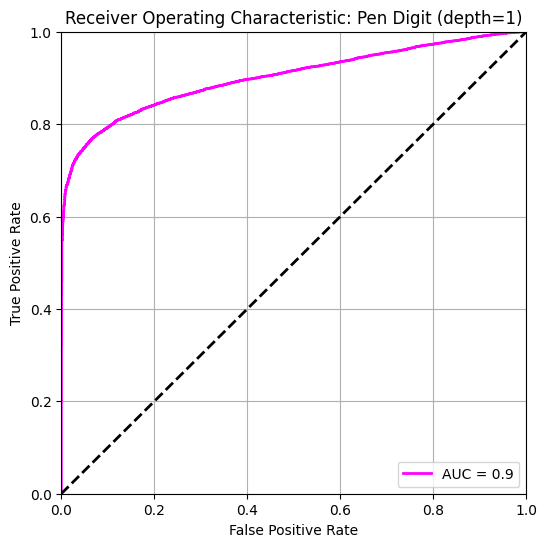

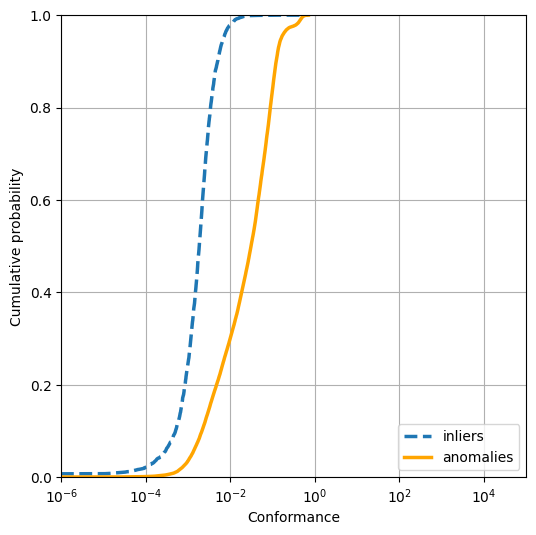

[Overall] depth: 1 | auc: 0.9011941225982674, se: 0.0018199790230139764
start digit: 0, depth: 2
len(data.corpus): 780
len(data.test_inlier): 363
len(data.test_outlier): 3135
fit_time: 0.5404798984527588
compute_score_time: 1.9520549774169922
depth: 2, digit: 0 | auc: 0.9994156440437432
start digit: 1, depth: 2
len(data.corpus): 779
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.355914831161499
compute_score_time: 1.9600138664245605
depth: 2, digit: 1 | auc: 0.882206498032918
start digit: 2, depth: 2
len(data.corpus): 780
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.3847951889038086
compute_score_time: 2.0099740028381348
depth: 2, digit: 2 | auc: 0.9511227445177669
start digit: 3, depth: 2
len(data.corpus): 719
len(data.test_inlier): 336
len(data.test_outlier): 3162
fit_time: 0.3467741012573242
compute_score_time: 2.1548078060150146
depth: 2, digit: 3 | auc: 0.9886656275413391
start digit: 4, depth: 2
len(data.corpus): 780
len(data.test_inlie

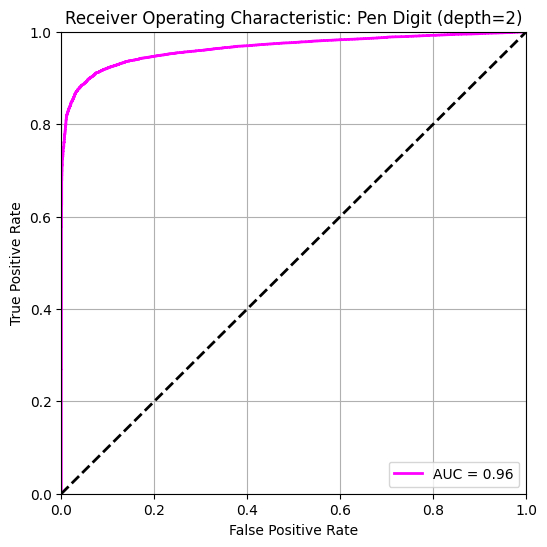

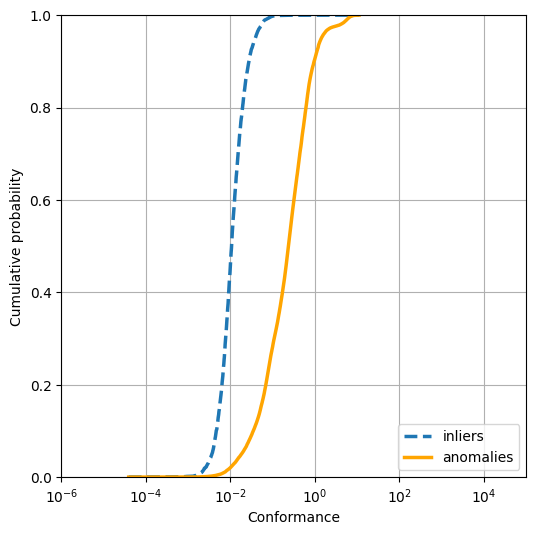

[Overall] depth: 2 | auc: 0.964656389818477, se: 0.000996684501036075
start digit: 0, depth: 3
len(data.corpus): 780
len(data.test_inlier): 363
len(data.test_outlier): 3135
fit_time: 0.46571898460388184
compute_score_time: 2.3499162197113037
depth: 3, digit: 0 | auc: 0.9978321712119015
start digit: 1, depth: 3
len(data.corpus): 779
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.3867340087890625
compute_score_time: 2.099860906600952
depth: 3, digit: 1 | auc: 0.970122092330133
start digit: 2, depth: 3
len(data.corpus): 780
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.5770339965820312
compute_score_time: 2.220491886138916
depth: 3, digit: 2 | auc: 0.9907229815494015
start digit: 3, depth: 3
len(data.corpus): 719
len(data.test_inlier): 336
len(data.test_outlier): 3162
fit_time: 0.5918891429901123
compute_score_time: 2.3016130924224854
depth: 3, digit: 3 | auc: 0.9952787566639559
start digit: 4, depth: 3
len(data.corpus): 780
len(data.test_inlier)

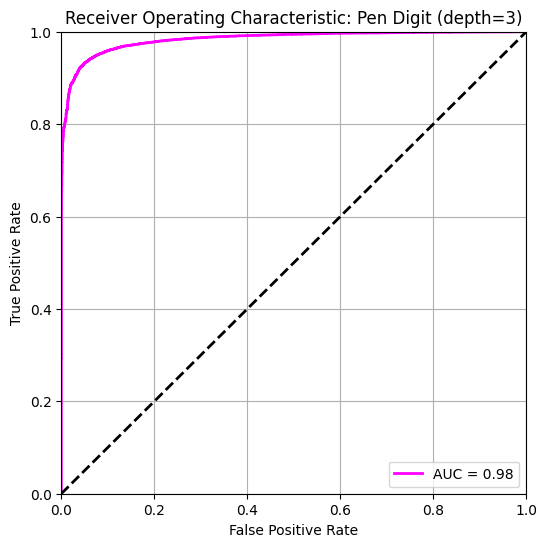

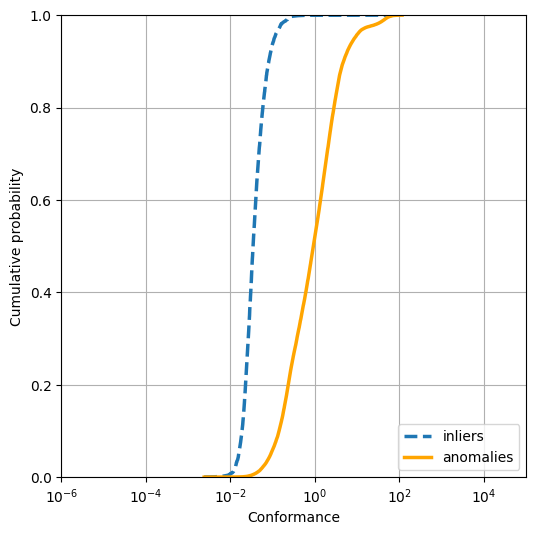

[Overall] depth: 3 | auc: 0.9833291162703119, se: 0.0007068219430043255
start digit: 0, depth: 4
len(data.corpus): 780
len(data.test_inlier): 363
len(data.test_outlier): 3135
fit_time: 0.6002678871154785
compute_score_time: 2.532289981842041
depth: 4, digit: 0 | auc: 0.9949666301993401
start digit: 1, depth: 4
len(data.corpus): 779
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.7685201168060303
compute_score_time: 2.333526134490967
depth: 4, digit: 1 | auc: 0.9852398718065597
start digit: 2, depth: 4
len(data.corpus): 780
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.392780065536499
compute_score_time: 2.5518112182617188
depth: 4, digit: 2 | auc: 0.9894510403444672
start digit: 3, depth: 4
len(data.corpus): 719
len(data.test_inlier): 336
len(data.test_outlier): 3162
fit_time: 0.40236377716064453
compute_score_time: 2.4662158489227295
depth: 4, digit: 3 | auc: 0.9959752718291617
start digit: 4, depth: 4
len(data.corpus): 780
len(data.test_inlie

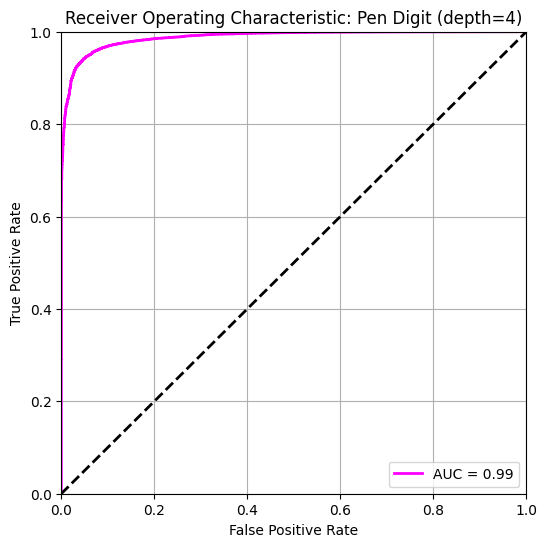

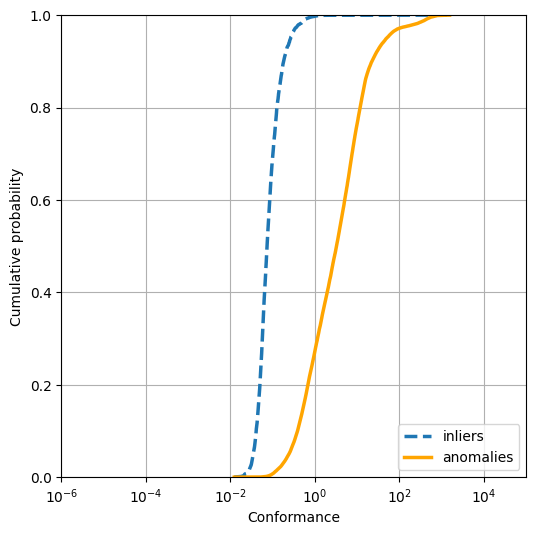

[Overall] depth: 4 | auc: 0.9873372557831062, se: 0.0006297945230732222
start digit: 0, depth: 5
len(data.corpus): 780
len(data.test_inlier): 363
len(data.test_outlier): 3135
fit_time: 1.0244522094726562
compute_score_time: 21.499464988708496
depth: 5, digit: 0 | auc: 0.9947583710089147
start digit: 1, depth: 5
len(data.corpus): 779
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 1.1579310894012451
compute_score_time: 19.772990942001343
depth: 5, digit: 1 | auc: 0.9900453726235474
start digit: 2, depth: 5
len(data.corpus): 780
len(data.test_inlier): 364
len(data.test_outlier): 3134
fit_time: 0.9833040237426758
compute_score_time: 20.39082407951355
depth: 5, digit: 2 | auc: 0.9912235180263259
start digit: 3, depth: 5
len(data.corpus): 719
len(data.test_inlier): 336
len(data.test_outlier): 3162
fit_time: 1.2962219715118408
compute_score_time: 22.44525408744812
depth: 5, digit: 3 | auc: 0.9964675386283546
start digit: 4, depth: 5
len(data.corpus): 780
len(data.test_inlie

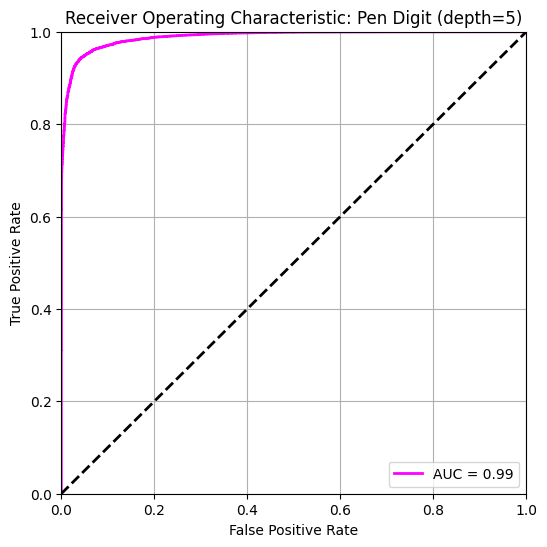

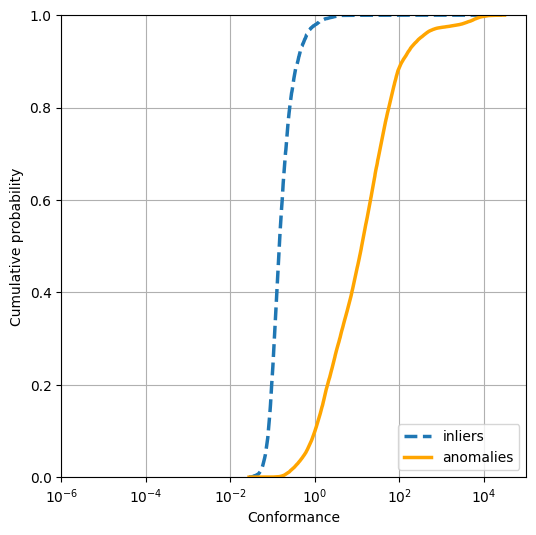

[Overall] depth: 5 | auc: 0.9887069340611527, se: 0.0005993181174264562
CPU times: user 36min 37s, sys: 3min 18s, total: 39min 55s
Wall time: 13min 58s


In [6]:
%%time
results_pen_digit = {
    "depth": [],
    "auc": [],
    "se": [],
}

for depth in depths:
    results_pen_digit["depth"].append(depth)
    digit_to_inlier_dists = {}
    digit_to_outlier_dists = {}

    for digit in digits:
        data.load_pen_digit(digit=digit)
        print(f"start digit: {digit}, depth: {depth}")
        print("len(data.corpus):", len(data.corpus))
        print("len(data.test_inlier):", len(data.test_inlier))
        print("len(data.test_outlier):", len(data.test_outlier))

        signature_maha_knn = SignatureMahalanobisKNN(n_jobs=-1, random_state=seed)
        # measure the time spent on fit
        start_time = time.time()
        signature_maha_knn.fit(
            knn_library="pynndescent",
            X_train=data.corpus,
            signature_kwargs={
                "augmentation_list": None,
                "depth": depth,
            },
        )
        fit_time = time.time() - start_time
        print(f"fit_time: {fit_time}")

        # measure the time spent on conformance
        start_time = time.time()
        inlier_dists = signature_maha_knn.conformance(
            data.test_inlier, n_neighbors=n_neighbours
        )
        outlier_dists = signature_maha_knn.conformance(
            data.test_outlier, n_neighbors=n_neighbours
        )
        compute_score_time = time.time() - start_time
        print(f"compute_score_time: {compute_score_time}")

        digit_to_inlier_dists[digit] = inlier_dists
        digit_to_outlier_dists[digit] = outlier_dists

        auc = compute_auc_given_dists(inlier_dists, outlier_dists)
        print(f"depth: {depth}, digit: {digit} | auc: {auc}")

    # plot and compute auc
    all_inlier_dists = np.concatenate(list(digit_to_inlier_dists.values()))
    all_outlier_dists = np.concatenate(list(digit_to_outlier_dists.values()))
    auc, se = compute_auc_given_dists(
        all_inlier_dists,
        all_outlier_dists,
        bootstrap=True,
        bootstrap_samples=bootstrap_samples,
        random_state=seed,
        plot=True,
        title=f"Pen Digit (depth={depth})",
    )

    # save results
    results_pen_digit["auc"].append(auc)
    results_pen_digit["se"].append(se)

    # plot CDF
    plot_cdf_given_dists(
        all_inlier_dists,
        all_outlier_dists,
        bins=10000000,
        xrange=(10e-7, 10e4),
        xlog=True,
        title=f"",
    )

    print(f"[Overall] depth: {depth} | auc: {auc}, se: {se}")

In [7]:
pd.DataFrame(results_pen_digit)

,depth,auc,se
0,1,0.901194,0.001820
1,2,0.964656,0.000997
2,3,0.983329,0.000707
3,4,0.987337,0.000630
4,5,0.988707,0.000599


## Can we reproduce distances?

For depth 2, digit 0, no augmentation_list:

In [7]:
data = Data.Data(n_samples=(800, 30, 30), if_sample=True)
data.load_pen_digit()

In [8]:
digit = 0
depth = 2
data.load_pen_digit(digit=digit)
print("doing digit", digit, "doing signature level ", depth)
signature_maha_knn = SignatureMahalanobisKNN(n_jobs=-1, random_state=seed)
# measure the time spent on fit
start_time = time.time()
signature_maha_knn.fit(
    knn_library="sklearn",
    X_train=data.corpus,
    signature_kwargs={},
)
fit_time = time.time() - start_time
print(f"fit_time: {fit_time}")

inlier_dists = signature_maha_knn.conformance(
    data.test_inlier, n_neighbors=n_neighbours
)
outlier_dists = signature_maha_knn.conformance(
    data.test_outlier, n_neighbors=n_neighbours
)

doing digit 0 doing signature level  2
fit_time: 1.8049709796905518


#### Inlier dists

In [9]:
inlier_dists

array([0.02203349, 0.02636506, 0.01619603, 0.01555797, 0.11322956,
       0.03182318, 0.02529738, 0.09760276, 0.01769069, 0.0184093 ,
       0.03047298, 0.01305365, 0.02557788, 0.07339484, 0.01822537,
       0.07480418, 0.02407774, 0.17452867, 0.03732281, 0.10320762,
       0.01851509, 0.01398619, 0.01354816, 0.01247237, 0.02372335,
       0.01140402, 0.02230901, 0.04476067, 0.0622557 , 0.02477818])

#### Should be 
array([[0.00048547],
       [0.00069512],
       [0.00026231],
       [0.00024205],
       [0.01478617],
       [0.00101271],
       [0.00063996],
       [0.01085489],
       [0.00031296],
       [0.0003389 ],
       [0.0009286 ],
       [0.0001704 ],
       [0.00065423],
       [0.0053868 ],
       [0.00033216],
       [0.00559567],
       [0.00057974],
       [0.03442473],
       [0.00139299],
       [0.01456522],
       [0.00034281],
       [0.00019561],
       [0.00018355],
       [0.00015556],
       [0.0005628 ],
       [0.00013005],
       [0.00049769],
       [0.00200352],
       [0.00387577],
       [0.00061396]])

In [10]:
previous_output = np.array(
    [
        [0.00048547],
        [0.00069512],
        [0.00026231],
        [0.00024205],
        [0.01478617],
        [0.00101271],
        [0.00063996],
        [0.01085489],
        [0.00031296],
        [0.0003389],
        [0.0009286],
        [0.0001704],
        [0.00065423],
        [0.0053868],
        [0.00033216],
        [0.00559567],
        [0.00057974],
        [0.03442473],
        [0.00139299],
        [0.01456522],
        [0.00034281],
        [0.00019561],
        [0.00018355],
        [0.00015556],
        [0.0005628],
        [0.00013005],
        [0.00049769],
        [0.00200352],
        [0.00387577],
        [0.00061396],
    ]
)

In [11]:
np.sqrt(previous_output).reshape(30)

array([0.02203338, 0.02636513, 0.01619599, 0.01555796, 0.1215984 ,
       0.0318231 , 0.02529743, 0.1041868 , 0.01769068, 0.01840924,
       0.03047294, 0.01305374, 0.02557792, 0.07339482, 0.01822526,
       0.07480421, 0.02407779, 0.18553903, 0.03732278, 0.12068645,
       0.01851513, 0.01398606, 0.01354806, 0.01247237, 0.02372341,
       0.01140395, 0.02230897, 0.0447607 , 0.06225568, 0.02477822])

square root the expected distance array and compare to what we get:

In [12]:
np.sqrt(previous_output).reshape(30) - inlier_dists

array([-1.02698604e-07,  7.06201024e-08, -4.48023166e-08, -1.52162402e-08,
        8.36883323e-03, -7.46429760e-08,  5.43689659e-08,  6.58404394e-03,
       -1.29966361e-08, -6.40953989e-08, -3.90337506e-08,  8.24570676e-08,
        4.13584945e-08, -1.25793449e-08, -1.17102862e-07,  2.81579632e-08,
        4.75885919e-08,  1.10103507e-02, -3.11002757e-08,  1.74788333e-02,
        3.86669326e-08, -1.21665173e-07, -1.00438225e-07,  3.97413871e-09,
        5.21471378e-08, -6.93480474e-08, -4.72183132e-08,  2.90194190e-08,
       -2.10565009e-08,  4.07364884e-08])

In [13]:
previous_output.reshape(30) - (inlier_dists**2)

array([-4.52560604e-09,  3.72381116e-09, -1.45123750e-09, -4.73467427e-10,
        1.96523603e-03, -4.75074807e-09,  2.75078734e-09,  1.32859135e-03,
       -4.59838713e-10, -2.35989886e-09, -2.37894771e-09,  2.15273864e-09,
        2.11572683e-09, -1.84651773e-09, -4.26847328e-09,  4.21266765e-09,
        2.29165403e-09,  3.96447167e-03, -2.32149854e-09,  3.91340718e-03,
        1.43184499e-09, -3.40324873e-09, -2.72149679e-09,  9.91338369e-11,
        2.47421274e-09, -1.58168768e-09, -2.10678580e-09,  2.59785800e-09,
       -2.62177412e-09,  2.01875338e-09])

In [14]:
inlier_dists**2

array([0.00048547, 0.00069512, 0.00026231, 0.00024205, 0.01282093,
       0.00101271, 0.00063996, 0.0095263 , 0.00031296, 0.0003389 ,
       0.0009286 , 0.0001704 , 0.00065423, 0.0053868 , 0.00033216,
       0.00559567, 0.00057974, 0.03046026, 0.00139299, 0.01065181,
       0.00034281, 0.00019561, 0.00018355, 0.00015556, 0.0005628 ,
       0.00013005, 0.00049769, 0.00200352, 0.00387577, 0.00061396])

#### Outlier dists

In [15]:
outlier_dists

array([0.67234357, 0.24378294, 0.12239674, 0.2594328 , 0.24765937,
       0.12541939, 0.21369961, 0.20740823, 0.70915457, 0.71401431,
       0.23341582, 0.55010934, 0.18330298, 0.28309617, 0.24274554,
       0.27733141, 0.74215369, 0.43625734, 0.62571779, 0.26774461,
       0.22821211, 0.70655548, 0.45673413, 0.43718576, 0.09406633,
       0.17178055, 0.2021866 , 0.50789138, 0.46324354, 0.2810891 ])

#### Should be
array([[0.51469102],
       [0.05943012],
       [0.01498096],
       [0.06730538],
       [0.06133516],
       [0.01573002],
       [0.04566752],
       [0.04301818],
       [0.5029002 ],
       [0.56088974],
       [0.05448295],
       [0.39831413],
       [0.03359998],
       [0.08014344],
       [0.05892539],
       [0.07691271],
       [0.67933435],
       [0.20881273],
       [0.42321369],
       [0.07168717],
       [0.05208077],
       [0.51004513],
       [0.29315337],
       [0.21727576],
       [0.00884847],
       [0.02950856],
       [0.04087942],
       [0.33563053],
       [0.26939553],
       [0.07901108]])

square root the expected distance array and compare to what we get:

In [16]:
previous_output = np.array(
    [
        [0.51469102],
        [0.05943012],
        [0.01498096],
        [0.06730538],
        [0.06133516],
        [0.01573002],
        [0.04566752],
        [0.04301818],
        [0.5029002],
        [0.56088974],
        [0.05448295],
        [0.39831413],
        [0.03359998],
        [0.08014344],
        [0.05892539],
        [0.07691271],
        [0.67933435],
        [0.20881273],
        [0.42321369],
        [0.07168717],
        [0.05208077],
        [0.51004513],
        [0.29315337],
        [0.21727576],
        [0.00884847],
        [0.02950856],
        [0.04087942],
        [0.33563053],
        [0.26939553],
        [0.07901108],
    ]
)

In [17]:
np.sqrt(previous_output).reshape(30)

array([0.7174197 , 0.24378294, 0.12239673, 0.2594328 , 0.24765936,
       0.12541938, 0.2136996 , 0.20740824, 0.70915457, 0.74892572,
       0.23341583, 0.63112133, 0.18330297, 0.28309617, 0.24274553,
       0.27733141, 0.82421742, 0.45696032, 0.65054876, 0.2677446 ,
       0.22821212, 0.71417444, 0.5414364 , 0.46612848, 0.09406631,
       0.17178056, 0.2021866 , 0.57933628, 0.51903326, 0.2810891 ])

In [18]:
np.sqrt(previous_output).reshape(30) - outlier_dists

array([ 4.50761275e-02, -6.08927639e-09, -7.72790068e-09, -5.17113019e-10,
       -9.18373180e-09, -9.48045786e-09, -4.75888406e-09,  1.14024833e-08,
        1.77743376e-10,  3.49114167e-02,  8.53382895e-09,  8.10119833e-02,
       -4.34167857e-09, -5.11723497e-10, -1.01032923e-08,  2.49688659e-10,
        8.20637253e-02,  2.07029803e-02,  2.48309681e-02, -8.65450989e-09,
        4.68641612e-09,  7.61895942e-03,  8.47022696e-02,  2.89427237e-02,
       -2.48877985e-08,  6.82265699e-09,  5.94662181e-10,  7.14449057e-02,
        5.57897246e-02, -7.37194078e-09])

In [19]:
previous_output.reshape(30) - (outlier_dists**2)

array([ 6.26451461e-02, -2.96892338e-09, -1.89173964e-09, -2.68312150e-10,
       -4.54887442e-09, -2.37806632e-09, -2.03394328e-09,  4.72993795e-09,
        2.52095012e-10,  5.10733090e-02,  3.98386147e-09,  9.56938395e-02,
       -1.59168519e-09, -2.89733917e-10, -4.90505807e-09,  1.38493023e-10,
        1.28542248e-01,  1.84922675e-02,  3.16909341e-02, -4.63439662e-09,
        2.13899385e-09,  1.08244836e-02,  8.45473085e-02,  2.61443743e-02,
       -4.68220719e-09,  2.34399960e-09,  2.40465446e-10,  7.76768778e-02,
        5.48009524e-02, -4.14434438e-09])

In [20]:
outlier_dists**2

array([0.45204587, 0.05943012, 0.01498096, 0.06730538, 0.06133516,
       0.01573002, 0.04566752, 0.04301818, 0.5029002 , 0.50981643,
       0.05448295, 0.30262029, 0.03359998, 0.08014344, 0.05892539,
       0.07691271, 0.5507921 , 0.19032046, 0.39152276, 0.07168717,
       0.05208077, 0.49922065, 0.20860606, 0.19113139, 0.00884847,
       0.02950856, 0.04087942, 0.25795365, 0.21459458, 0.07901108])

## Can we reproduce distances?

For depth 4, digit 0, with augmentation_list=None

In [21]:
digit = 0
depth = 4
data.load_pen_digit(digit=digit)
print("doing digit", digit, "doing signature level ", depth)
signature_maha_knn = SignatureMahalanobisKNN()
# measure the time spent on fit
start_time = time.time()
signature_maha_knn.fit(
    knn_library="sklearn",
    X_train=data.corpus,
    signature_kwargs={
        "augmentation_list": None,
        "depth": depth,
    },
)
fit_time = time.time() - start_time
print(f"fit_time: {fit_time}")

inlier_dists = signature_maha_knn.conformance(
    data.test_inlier, n_neighbors=n_neighbours
)
outlier_dists = signature_maha_knn.conformance(
    data.test_outlier, n_neighbors=n_neighbours
)

doing digit 0 doing signature level  4
fit_time: 1.5386781692504883


#### Inlier dists

In [22]:
inlier_dists

array([0.03967367, 0.05504537, 0.03504562, 0.02803288, 0.79020931,
       0.09154714, 0.03940437, 0.60588313, 0.05382932, 0.0664232 ,
       0.07546581, 0.04712501, 0.05999963, 0.27495292, 0.04513797,
       0.39363584, 0.08103539, 1.12660827, 0.13128929, 0.72245765,
       0.06584397, 0.0319688 , 0.02719407, 0.06510798, 0.05253445,
       0.03191909, 0.04620362, 0.10642687, 0.21951508, 0.04757213])

#### Should be 
array([[1.57399406e-03],
       [3.02998419e-03],
       [1.22819305e-03],
       [7.85843469e-04],
       [6.24430478e-01],
       [8.38084612e-03],
       [1.55270391e-03],
       [3.67094040e-01],
       [2.89758784e-03],
       [4.41202335e-03],
       [5.69510600e-03],
       [2.22076988e-03],
       [3.59995430e-03],
       [7.55992085e-02],
       [2.03744438e-03],
       [1.54949293e-01],
       [6.56671124e-03],
       [1.26924562e+00],
       [1.72368567e-02],
       [5.21945238e-01],
       [4.33543418e-03],
       [1.02200045e-03],
       [7.39515584e-04],
       [4.23905114e-03],
       [2.75986036e-03],
       [1.01882860e-03],
       [2.13477737e-03],
       [1.13266921e-02],
       [4.81867641e-02],
       [2.26310734e-03]])

In [23]:
previous_output = np.array(
    [
        [1.57399406e-03],
        [3.02998419e-03],
        [1.22819305e-03],
        [7.85843469e-04],
        [6.24430478e-01],
        [8.38084612e-03],
        [1.55270391e-03],
        [3.67094040e-01],
        [2.89758784e-03],
        [4.41202335e-03],
        [5.69510600e-03],
        [2.22076988e-03],
        [3.59995430e-03],
        [7.55992085e-02],
        [2.03744438e-03],
        [1.54949293e-01],
        [6.56671124e-03],
        [1.26924562e00],
        [1.72368567e-02],
        [5.21945238e-01],
        [4.33543418e-03],
        [1.02200045e-03],
        [7.39515584e-04],
        [4.23905114e-03],
        [2.75986036e-03],
        [1.01882860e-03],
        [2.13477737e-03],
        [1.13266921e-02],
        [4.81867641e-02],
        [2.26310734e-03],
    ]
)

In [24]:
np.sqrt(previous_output).reshape(30)

array([0.03967359, 0.05504529, 0.03504559, 0.0280329 , 0.79020914,
       0.09154696, 0.03940436, 0.60588286, 0.05382925, 0.06642306,
       0.07546593, 0.04712505, 0.05999962, 0.2749531 , 0.04513806,
       0.39363599, 0.08103525, 1.12660802, 0.13128921, 0.72245778,
       0.06584401, 0.03196874, 0.02719404, 0.065108  , 0.05253437,
       0.03191909, 0.04620365, 0.10642693, 0.21951484, 0.04757213])

square root the expected distance array and compare to what we get:

In [25]:
np.sqrt(previous_output).reshape(30) - inlier_dists

array([-7.68822677e-08, -7.29154133e-08, -3.01010823e-08,  2.25582237e-08,
       -1.75527447e-07, -1.74475403e-07, -1.03651831e-08, -2.69768624e-07,
       -7.08082831e-08, -1.33603602e-07,  1.14141816e-07,  3.97771448e-08,
       -1.01507058e-08,  1.83509061e-07,  8.58520603e-08,  1.46178658e-07,
       -1.38500575e-07, -2.50542729e-07, -7.64500813e-08,  1.26416519e-07,
        4.15011214e-08, -5.37298039e-08, -3.83827406e-08,  1.13304001e-08,
       -7.41194778e-08,  2.26507350e-09,  3.39079999e-08,  6.54568523e-08,
       -2.45914014e-07, -4.55573797e-09])

In [26]:
previous_output.reshape(30) - (inlier_dists**2)

array([-6.10039766e-09, -8.02730577e-09, -2.10982100e-09,  1.26474434e-09,
       -2.77406814e-07, -3.19454164e-08, -8.16867004e-10, -3.26896443e-07,
       -7.62311814e-09, -1.77487390e-08,  1.72276227e-08,  3.74899791e-09,
       -1.21807706e-09,  1.00912738e-07,  7.75038337e-09,  1.15082340e-07,
       -2.24468758e-08, -5.64526956e-07, -2.00741474e-08,  1.82661179e-07,
        5.46519911e-09, -3.43535134e-09, -2.08756472e-09,  1.47539916e-09,
       -7.78764610e-09,  1.44598185e-10,  3.13334564e-09,  1.39327398e-08,
       -1.07963610e-07, -4.33452318e-10])

In [27]:
inlier_dists**2

array([1.57400016e-03, 3.02999222e-03, 1.22819516e-03, 7.85842204e-04,
       6.24430755e-01, 8.38087807e-03, 1.55270473e-03, 3.67094367e-01,
       2.89759546e-03, 4.41204110e-03, 5.69508877e-03, 2.22076613e-03,
       3.59995552e-03, 7.55991076e-02, 2.03743663e-03, 1.54949178e-01,
       6.56673369e-03, 1.26924618e+00, 1.72368768e-02, 5.21945055e-01,
       4.33542871e-03, 1.02200389e-03, 7.39517672e-04, 4.23904966e-03,
       2.75986815e-03, 1.01882846e-03, 2.13477424e-03, 1.13266782e-02,
       4.81868721e-02, 2.26310777e-03])

#### Outlier dists

In [28]:
outlier_dists

array([15.68734774,  2.88892802,  0.55714101,  1.50823125,  1.5675811 ,
        1.00905713,  2.91069471,  2.05114721, 18.6500535 , 17.46589804,
        2.31507787, 11.18594221,  2.08877256,  3.5896572 ,  2.07437671,
        1.70494233, 16.20276287, 11.34922168, 14.22447212,  1.79131614,
        1.72692897, 17.4224665 , 10.45685905, 11.10301968,  0.40264396,
        1.66121212,  2.47344445,  8.79436824, 10.39406515,  3.76990887])

#### Should be
array([[2.46092896e+02],
       [8.34590435e+00],
       [3.10406297e-01],
       [2.27476239e+00],
       [2.45730543e+00],
       [1.01819646e+00],
       [8.47214222e+00],
       [4.20720434e+00],
       [3.47824524e+02],
       [3.05057648e+02],
       [5.35958481e+00],
       [1.25125313e+02],
       [4.36297131e+00],
       [1.28856373e+01],
       [4.30303574e+00],
       [2.90682650e+00],
       [2.62529602e+02],
       [1.28804825e+02],
       [2.02335602e+02],
       [3.20881152e+00],
       [2.98228765e+00],
       [3.03542328e+02],
       [1.09345932e+02],
       [1.23277054e+02],
       [1.62122369e-01],
       [2.75962615e+00],
       [6.11792469e+00],
       [7.73409119e+01],
       [1.08036621e+02],
       [1.42122135e+01]])

square root the expected distance array and compare to what we get:

In [29]:
previous_output = np.array(
    [
        [2.46092896e02],
        [8.34590435e00],
        [3.10406297e-01],
        [2.27476239e00],
        [2.45730543e00],
        [1.01819646e00],
        [8.47214222e00],
        [4.20720434e00],
        [3.47824524e02],
        [3.05057648e02],
        [5.35958481e00],
        [1.25125313e02],
        [4.36297131e00],
        [1.28856373e01],
        [4.30303574e00],
        [2.90682650e00],
        [2.62529602e02],
        [1.28804825e02],
        [2.02335602e02],
        [3.20881152e00],
        [2.98228765e00],
        [3.03542328e02],
        [1.09345932e02],
        [1.23277054e02],
        [1.62122369e-01],
        [2.75962615e00],
        [6.11792469e00],
        [7.73409119e01],
        [1.08036621e02],
        [1.42122135e01],
    ]
)

In [30]:
np.sqrt(previous_output).reshape(30)

array([15.68734828,  2.88892789,  0.55714118,  1.50823154,  1.56757948,
        1.00905721,  2.91069446,  2.05114708, 18.65005426, 17.46589958,
        2.31507771, 11.18594265,  2.08877268,  3.58965699,  2.07437599,
        1.70494179, 16.20276526, 11.34922134, 14.22447194,  1.79131558,
        1.72693012, 17.42246619, 10.45686052, 11.10302004,  0.40264422,
        1.66121225,  2.47344389,  8.79436819, 10.39406662,  3.76990895])

In [31]:
np.sqrt(previous_output).reshape(30) - outlier_dists

array([ 5.42484775e-07, -1.29776750e-07,  1.75441668e-07,  2.94098708e-07,
       -1.62299082e-06,  8.76969586e-08, -2.51089855e-07, -1.30321758e-07,
        7.60598049e-07,  1.53263119e-06, -1.56555142e-07,  4.40688039e-07,
        1.22148594e-07, -2.11279730e-07, -7.22020625e-07, -5.40076410e-07,
        2.38531468e-06, -3.37048846e-07, -1.81282125e-07, -5.52109745e-07,
        1.15006647e-06, -3.10771561e-07,  1.47711321e-06,  3.62471932e-07,
        2.64911725e-07,  1.32784811e-07, -5.56680642e-07, -5.20487173e-08,
        1.47285028e-06,  8.01633524e-08])

In [32]:
previous_output.reshape(30) - (outlier_dists**2)

array([ 1.70202949e-05, -7.49831361e-07,  1.95491525e-07,  8.87137809e-07,
       -5.08833685e-06,  1.76982489e-07, -1.46169176e-06, -5.34618203e-07,
        2.83703892e-05,  5.35375625e-05, -7.24874663e-07,  9.85902207e-06,
        5.10281278e-07, -1.51684356e-06, -2.99548501e-06, -1.84159797e-06,
        7.72973819e-05, -7.65048404e-06, -5.15728505e-06, -1.97800588e-06,
        3.97216755e-06, -1.08288141e-05,  3.08919314e-05,  8.04906610e-06,
        2.13330280e-07,  4.41167494e-07, -2.75383698e-06, -9.15471176e-07,
        3.06178058e-05,  6.04417075e-07])

In [33]:
outlier_dists**2

array([2.46092879e+02, 8.34590510e+00, 3.10406102e-01, 2.27476150e+00,
       2.45731052e+00, 1.01819628e+00, 8.47214368e+00, 4.20720487e+00,
       3.47824496e+02, 3.05057594e+02, 5.35958553e+00, 1.25125303e+02,
       4.36297080e+00, 1.28856388e+01, 4.30303874e+00, 2.90682834e+00,
       2.62529525e+02, 1.28804833e+02, 2.02335607e+02, 3.20881350e+00,
       2.98228368e+00, 3.03542339e+02, 1.09345901e+02, 1.23277046e+02,
       1.62122156e-01, 2.75962571e+00, 6.11792744e+00, 7.73409128e+01,
       1.08036590e+02, 1.42122129e+01])

### Ship movement data example

In [10]:
# data = Data.Data(
#     n_samples=(800, 30, 30),
#     if_sample=True,
# )
data = Data.Data(
    if_sample=False,
)

start lead_lag: True, inv_reset: True, hreshold distance: 4000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 10.594706773757935
compute_score_time: 260.6194980144501


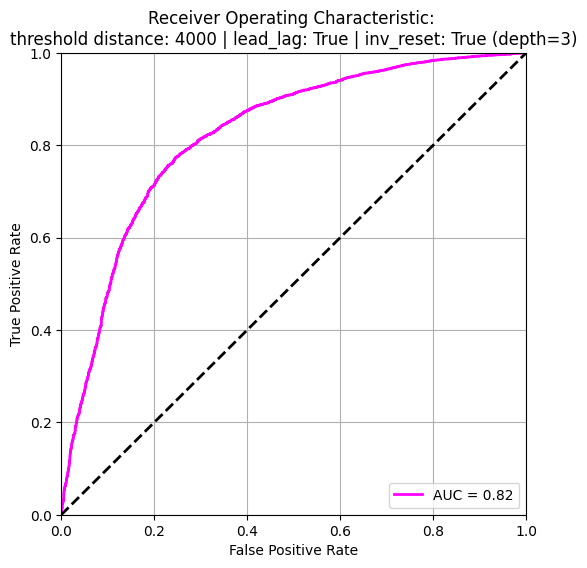

lead_lag: True, inv_rest: True, thres_distance: 4000 | auc: 0.82280472, se: 0.0041655641641094605
start lead_lag: True, inv_reset: True, hreshold distance: 8000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 12.204097032546997
compute_score_time: 254.3644561767578


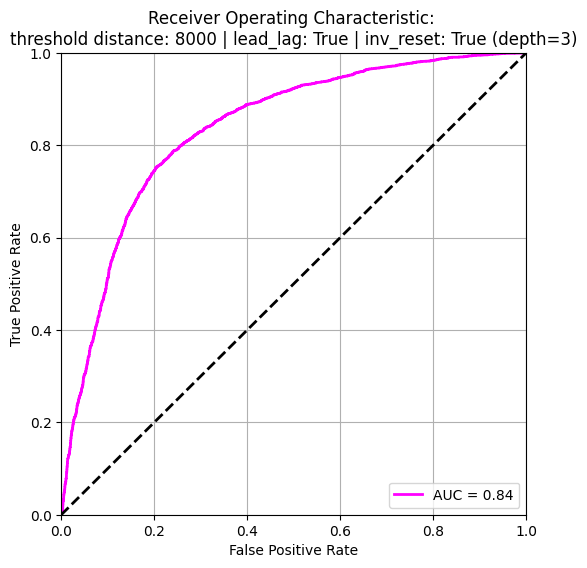

lead_lag: True, inv_rest: True, thres_distance: 8000 | auc: 0.8354299, se: 0.0040682243103842474
start lead_lag: True, inv_reset: True, hreshold distance: 16000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 7.286052942276001
compute_score_time: 230.54822611808777


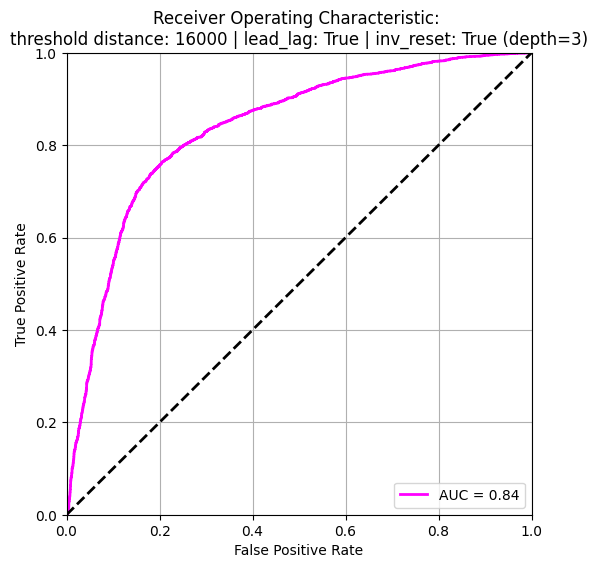

lead_lag: True, inv_rest: True, thres_distance: 16000 | auc: 0.83600728, se: 0.004019659728823448
start lead_lag: True, inv_reset: True, hreshold distance: 32000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 7.452008008956909
compute_score_time: 226.07007694244385


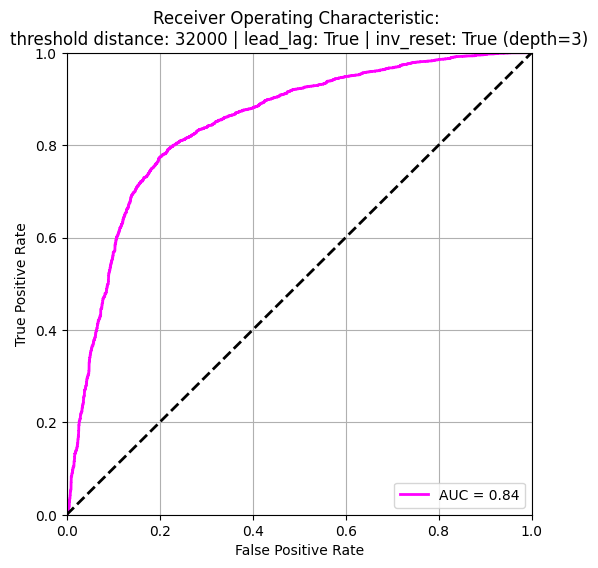

lead_lag: True, inv_rest: True, thres_distance: 32000 | auc: 0.8435623200000001, se: 0.003930059585481624
start lead_lag: True, inv_reset: False, hreshold distance: 4000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 6.61173415184021
compute_score_time: 226.51775527000427


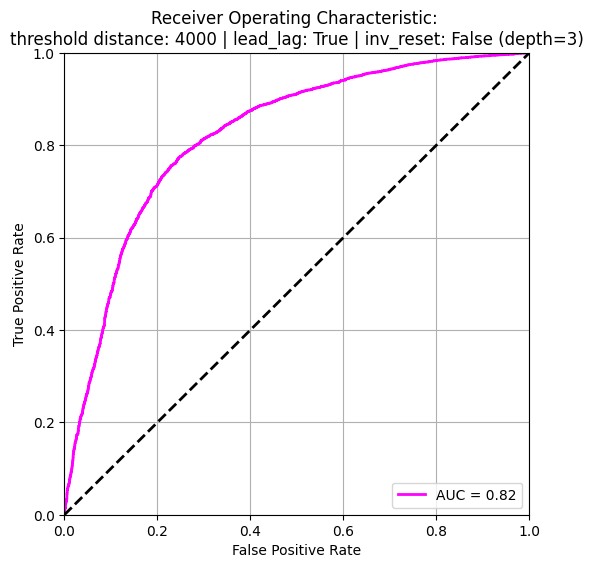

lead_lag: True, inv_rest: False, thres_distance: 4000 | auc: 0.82280472, se: 0.004202187594262548
start lead_lag: True, inv_reset: False, hreshold distance: 8000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 7.423964023590088
compute_score_time: 220.80930924415588


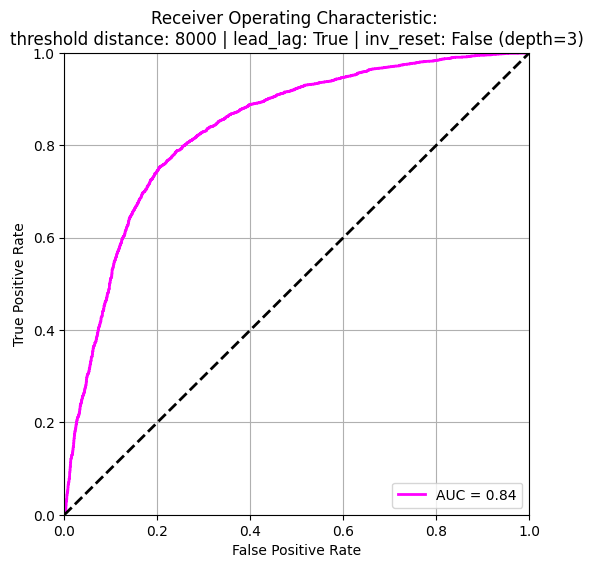

lead_lag: True, inv_rest: False, thres_distance: 8000 | auc: 0.8354299, se: 0.004057557376398554
start lead_lag: True, inv_reset: False, hreshold distance: 16000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 7.0987629890441895
compute_score_time: 224.36524081230164


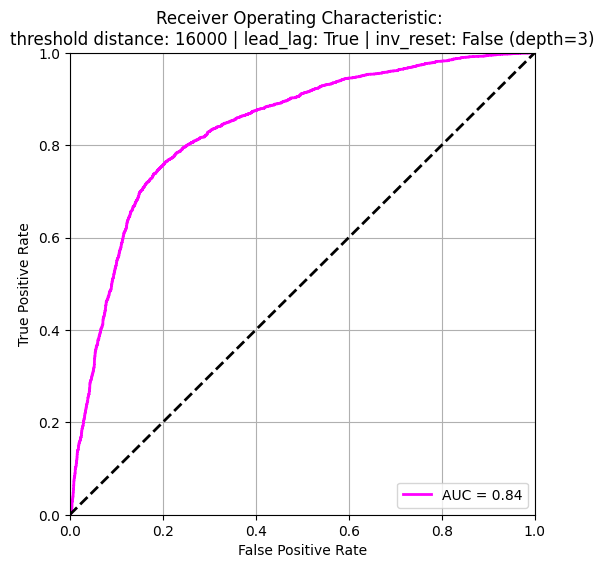

lead_lag: True, inv_rest: False, thres_distance: 16000 | auc: 0.83600728, se: 0.0040674549986700805
start lead_lag: True, inv_reset: False, hreshold distance: 32000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 7.476716995239258
compute_score_time: 226.60873913764954


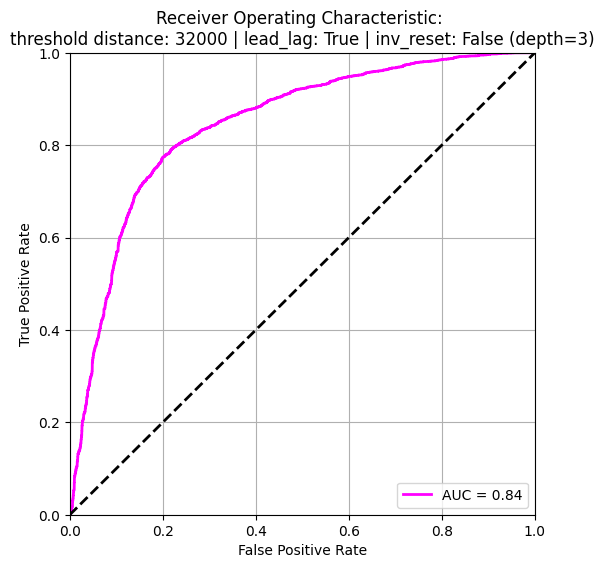

lead_lag: True, inv_rest: False, thres_distance: 32000 | auc: 0.8435623200000001, se: 0.0039522039194929744
start lead_lag: False, inv_reset: True, hreshold distance: 4000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 3.2968249320983887
compute_score_time: 14.262509822845459


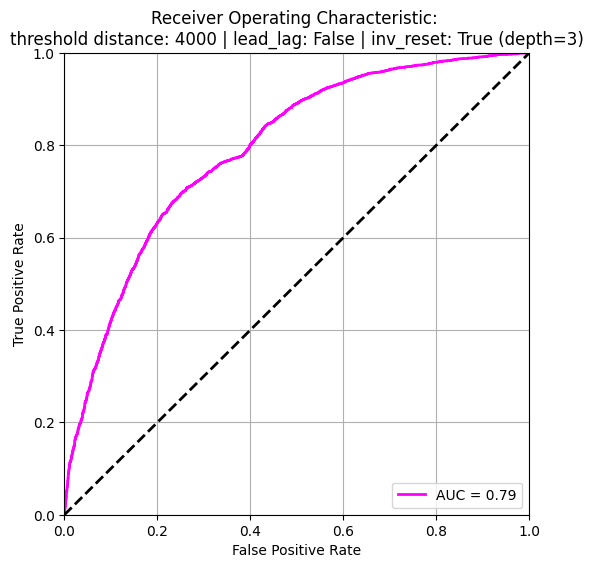

lead_lag: False, inv_rest: True, thres_distance: 4000 | auc: 0.79083528, se: 0.004489263224792137
start lead_lag: False, inv_reset: True, hreshold distance: 8000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 3.392848014831543
compute_score_time: 15.289485216140747


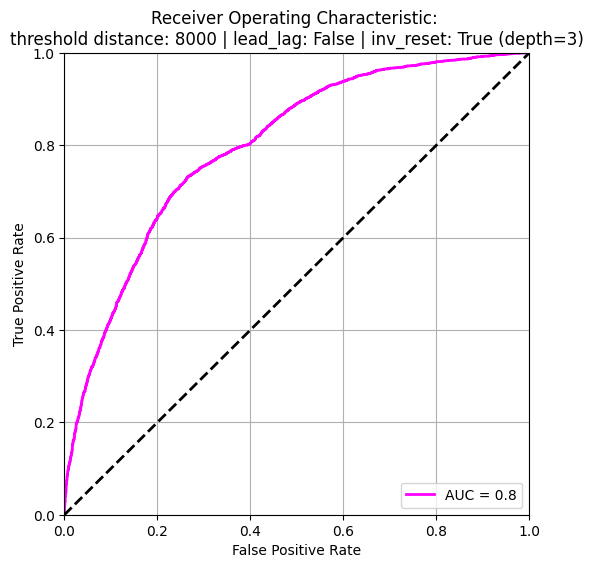

lead_lag: False, inv_rest: True, thres_distance: 8000 | auc: 0.7972313600000001, se: 0.004339703992225485
start lead_lag: False, inv_reset: True, hreshold distance: 16000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 3.2774367332458496
compute_score_time: 16.38131594657898


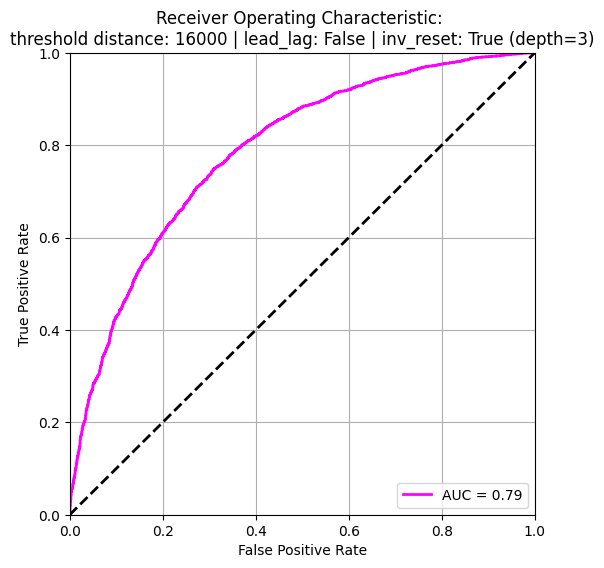

lead_lag: False, inv_rest: True, thres_distance: 16000 | auc: 0.7872492799999999, se: 0.004461242203995059
start lead_lag: False, inv_reset: True, hreshold distance: 32000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 3.326357126235962
compute_score_time: 14.104599952697754


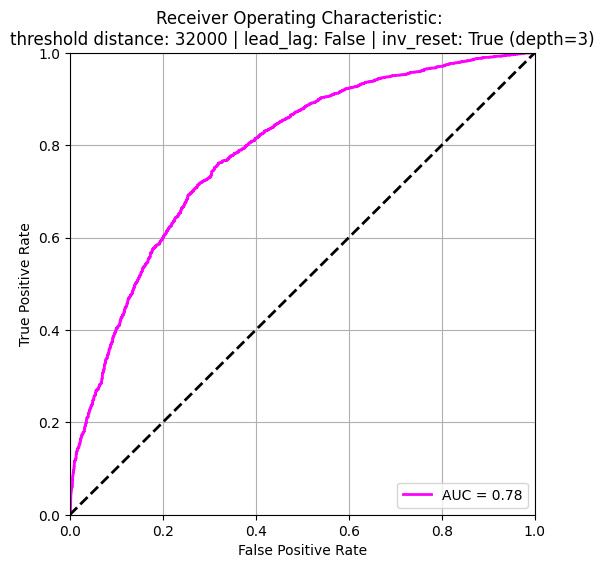

lead_lag: False, inv_rest: True, thres_distance: 32000 | auc: 0.78283072, se: 0.004512978053002217
start lead_lag: False, inv_reset: False, hreshold distance: 4000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 2.0303170680999756
compute_score_time: 5.177319288253784


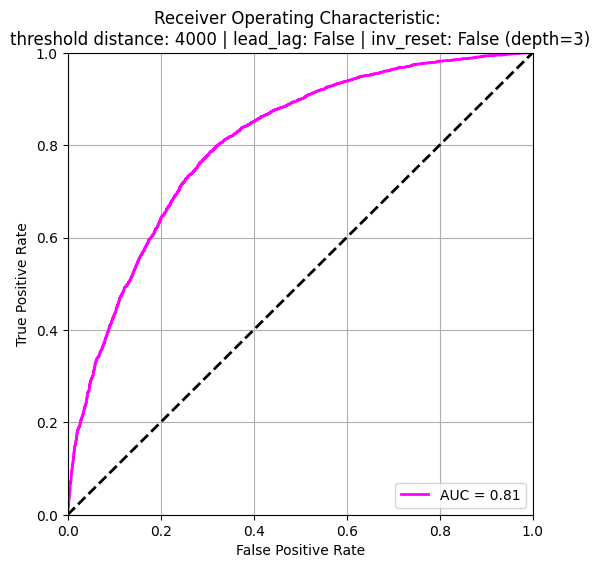

lead_lag: False, inv_rest: False, thres_distance: 4000 | auc: 0.80501988, se: 0.004282208610763979
start lead_lag: False, inv_reset: False, hreshold distance: 8000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 2.294326066970825
compute_score_time: 5.214544057846069


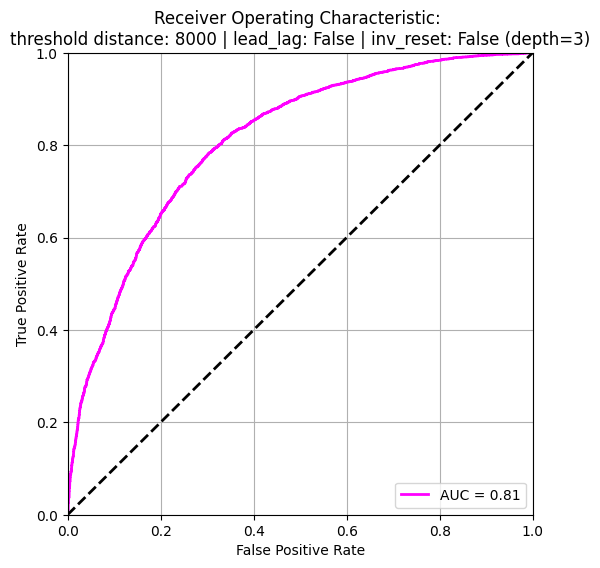

lead_lag: False, inv_rest: False, thres_distance: 8000 | auc: 0.80947012, se: 0.0042836308820557115
start lead_lag: False, inv_reset: False, hreshold distance: 16000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 2.087937116622925
compute_score_time: 5.3019118309021


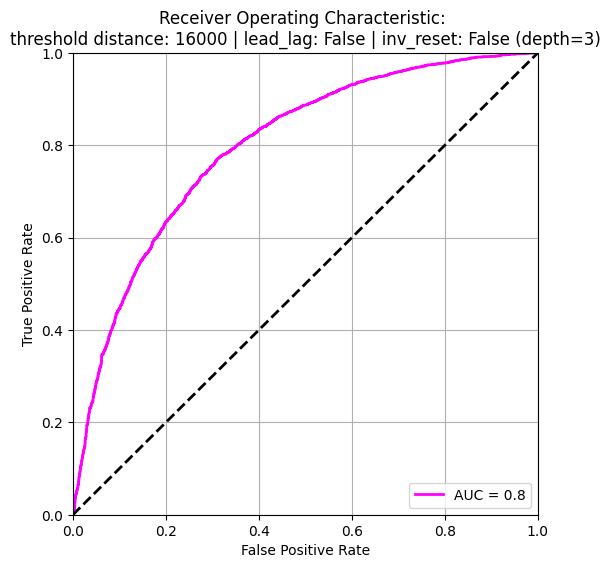

lead_lag: False, inv_rest: False, thres_distance: 16000 | auc: 0.79710896, se: 0.00439083983627161
start lead_lag: False, inv_reset: False, hreshold distance: 32000
len(data.corpus): 5000
len(data.test_inlier): 5000
len(data.test_outlier): 5000
fit_time: 2.3481831550598145
compute_score_time: 5.590728998184204


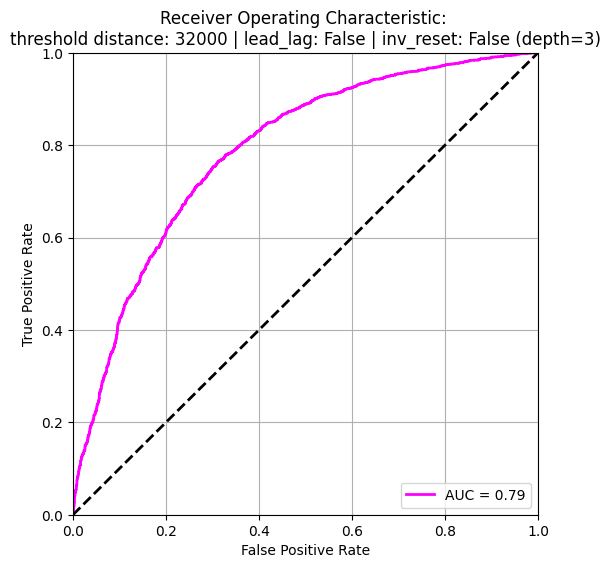

lead_lag: False, inv_rest: False, thres_distance: 32000 | auc: 0.78804452, se: 0.004543965887508712
CPU times: user 4h 42min 11s, sys: 4min 31s, total: 4h 46min 42s
Wall time: 44min 47s


In [14]:
%%time
results_ship_movement = {
    "lead_lag": [],
    "inv_reset": [],
    "thres_distance": [],
    "auc": [],
    "se": [],
}

depth = 3
for lead_lag in [True, False]:
    augmentation_list = []
    if lead_lag:
        augmentation_list.append("leadlag")
    for inv_reset in [True, False]:
        if inv_reset:
            augmentation_list.append("ir")

        if (not inv_reset) and (not lead_lag):
            augmentation_list = None

        for thres_distance in [4000, 8000, 16000, 32000]:
            # save hyperparameters for results
            results_ship_movement["lead_lag"].append(lead_lag)
            results_ship_movement["inv_reset"].append(inv_reset)
            results_ship_movement["thres_distance"].append(thres_distance)

            data.load_ship_movements(
                thres_distance=thres_distance,
            )
            print(
                f"start lead_lag: {lead_lag}, "
                f"inv_reset: {inv_reset}, "
                f"hreshold distance: {thres_distance}"
            )
            print("len(data.corpus):", len(data.corpus))
            print("len(data.test_inlier):", len(data.test_inlier))
            print("len(data.test_outlier):", len(data.test_outlier))

            signature_maha_knn = SignatureMahalanobisKNN(n_jobs=-1, random_state=seed)

            # measure the time spent on fit
            start_time = time.time()
            signature_maha_knn.fit(
                knn_library="pynndescent",
                X_train=data.corpus,
                signature_kwargs={
                    "augmentation_list": augmentation_list,
                    "depth": depth,
                },
            )
            fit_time = time.time() - start_time
            print(f"fit_time: {fit_time}")

            # measure the time spent on compute_auc
            start_time = time.time()
            inlier_dists = signature_maha_knn.conformance(
                data.test_inlier, n_neighbors=n_neighbours
            )
            outlier_dists = signature_maha_knn.conformance(
                data.test_outlier, n_neighbors=n_neighbours
            )
            compute_score_time = time.time() - start_time
            print(f"compute_score_time: {compute_score_time}")

            # plot and compute auc
            auc, se = compute_auc_given_dists(
                inlier_dists,
                outlier_dists,
                bootstrap=True,
                bootstrap_samples=bootstrap_samples,
                random_state=seed,
                plot=True,
                title=(
                    f"\nthreshold distance: {thres_distance} | "
                    f"lead_lag: {lead_lag} | "
                    f"inv_reset: {inv_reset} "
                    f"(depth={depth})"
                ),
            )

            # save results
            results_ship_movement["auc"].append(auc)
            results_ship_movement["se"].append(se)

            print(
                f"lead_lag: {lead_lag}, "
                f"inv_rest: {inv_reset}, "
                f"thres_distance: {thres_distance} | "
                f"auc: {auc}, "
                f"se: {se}"
            )

In [15]:
pd.DataFrame(results_ship_movement)

,lead_lag,inv_reset,thres_distance,auc,se
0,True,True,4000,0.822805,0.004166
1,True,True,8000,0.835430,0.004068
2,True,True,16000,0.836007,0.004020
3,True,True,32000,0.843562,0.003930
4,True,False,4000,0.822805,0.004202
5,True,False,8000,0.835430,0.004058
6,True,False,16000,0.836007,0.004067
7,True,False,32000,0.843562,0.003952
8,False,True,4000,0.790835,0.004489
9,False,True,8000,0.797231,0.004340


### UCR data example

In [36]:
# data = Data.Data(if_sample=True, n_samples=[100, 10, 10])
data = Data.Data(if_sample=False)
data_full_names = [
    "Adiac",
    "ArrowHead",
    "Beef",
    "BeetleFly",
    "BirdChicken",
    "CBF",
    "ChlorineConcentration",
    "Coffee",
    "ECG200",
    "ECGFiveDays",
    "FaceFour",
    "GunPoint",
    "Ham",
    "Herring",
    "Lightning2",
    "Lightning7",
    "Meat",
    "MedicalImages",
    "MoteStrain",
    "Plane",
    "Strawberry",
    "Symbols",
    "ToeSegmentation1",
    "ToeSegmentation2",
    "Trace",
    "TwoLeadECG",
    "Wafer",
    "Wine",
]

In [37]:
n_neighbours = 10

In [38]:
%%time
depth = 5
signature_maha_knn = SignatureMahalanobisKNN(n_jobs=-1, random_state=seed)

iter = 10
data_names = data_full_names

anomaly_level = 0.001
roughpathsbest, roughpathserror = UCR_data_support.compute_best_and_std(
    data_set=data_names,
    iter=iter,
    data=data,
    signature_maha_knn=signature_maha_knn,
    depth=depth,
    n_neighbours=n_neighbours,
    anomaly_level=anomaly_level,
)

anomaly_level = 0.05
roughpathsbest, roughpathserror = UCR_data_support.compute_best_and_std(
    data_set=data_names,
    iter=iter,
    data=data,
    signature_maha_knn=signature_maha_knn,
    depth=depth,
    n_neighbours=n_neighbours,
    anomaly_level=anomaly_level,
)

/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:264: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:264: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:264: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:264: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDri

CPU times: user 4h 3min 20s, sys: 1h 6min 6s, total: 5h 9min 27s
Wall time: 54min 29s


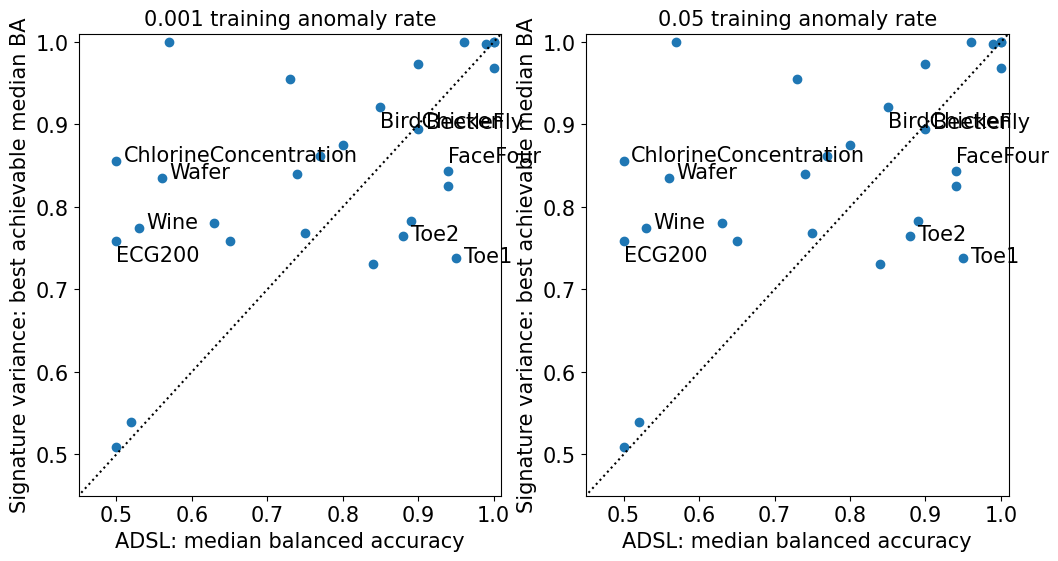

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
comparison_table_1 = UCR_data_support.plot_ucr_result(
    roughpathsbest, roughpathserror, anomaly_level=0.001, ax_num=0, axs=axs
)
comparison_table_2 = UCR_data_support.plot_ucr_result(
    roughpathsbest, roughpathserror, anomaly_level=0.05, ax_num=1, axs=axs
)
fig.savefig("benchmark.pdf")
plt.show()

In [40]:
comparison_table_1

,0,1,2,3,4
0,Adiac,0.998026,0.064889,0.99,0.1
1,ArrowHead,0.758741,0.06979,0.65,0.03
2,Beef,1.0,0.0,0.57,0.15
3,BeetleFly,0.894737,0.160296,0.9,0.08
4,BirdChicken,0.921053,0.143551,0.85,0.15
5,CBF,0.875265,0.01985,0.8,0.04
6,ChlorineConcentration,0.855262,0.01644,0.5,0.0
7,Coffee,0.730769,0.097301,0.84,0.04
8,ECG200,0.759014,0.062465,0.5,0.03
9,ECGFiveDays,0.824828,0.024429,0.94,0.11


In [41]:
comparison_table_2

,0,1,2,3,4
0,Adiac,0.998026,0.064889,0.99,0.1
1,ArrowHead,0.758741,0.06979,0.65,0.03
2,Beef,1.0,0.0,0.57,0.15
3,BeetleFly,0.894737,0.160296,0.9,0.08
4,BirdChicken,0.921053,0.143551,0.85,0.15
5,CBF,0.875265,0.01985,0.8,0.04
6,ChlorineConcentration,0.855262,0.01644,0.5,0.0
7,Coffee,0.730769,0.097301,0.84,0.04
8,ECG200,0.759014,0.062465,0.5,0.03
9,ECGFiveDays,0.824828,0.024429,0.94,0.11
